In [1]:
## Importing the dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.linear_model import LinearRegression

### Data Collection and processing


In [2]:
#Importing the dataset
calories = pd.read_csv('calories.csv')
exercise = pd.read_csv('exercise.csv')

In [3]:
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [4]:
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [5]:
#Combining both data frames based on same User_ID
data = pd.concat([exercise, calories['Calories']], axis =1)

In [6]:
data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [7]:
data.shape

(15000, 9)

In [8]:
data['User_ID'].nunique()

15000

In [9]:
#getting some information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [10]:
#checking for missing vaues
data.isnull().sum()   # ---> No missing values

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

### Data Analysis

In [11]:
# get some statistical measures about data
data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [12]:
# get some statistical measures about text column
data.describe(include = 'object')

,Gender
count,15000
unique,2
top,female
freq,7553


#### Data Visulization

In [13]:
sns.set()

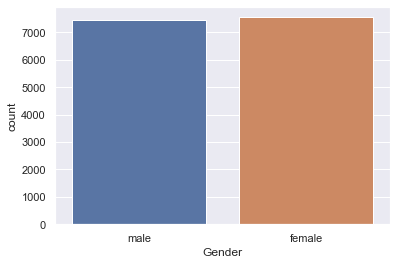

In [14]:
#plotting the gender column in count plot
sns.countplot(data['Gender'])

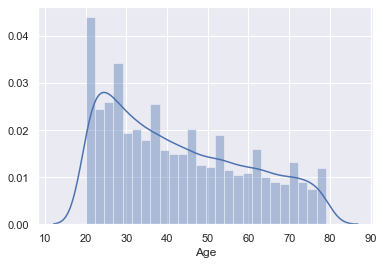

In [15]:
#finding the ditribution for Age column
sns.distplot(data['Age'])

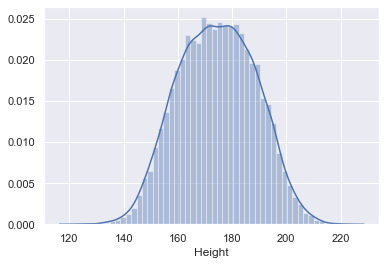

In [16]:
#finding the ditribution for Height column
sns.distplot(data['Height'])

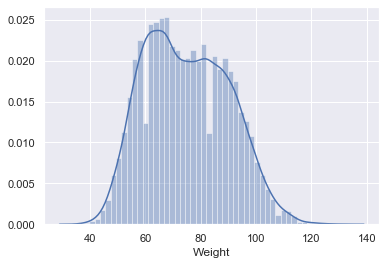

In [17]:
#finding the ditribution for Weight column
sns.distplot(data['Weight'])

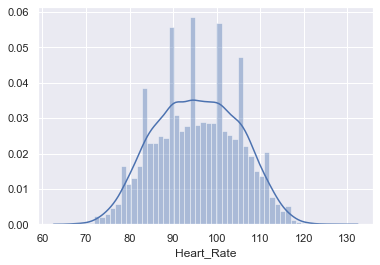

In [18]:
#finding the ditribution for Heart rate column
sns.distplot(data['Heart_Rate'])

#### Finding the correlation in data

In [19]:
data.corr()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
User_ID,1.000000,-0.001827,-0.013520,-0.011603,-0.002751,-0.000457,0.000923,-0.001661
Age,-0.001827,1.000000,0.009554,0.090094,0.013247,0.010482,0.013175,0.154395
Height,-0.013520,0.009554,1.000000,0.958451,-0.004625,0.000528,0.001200,0.017537
Weight,-0.011603,0.090094,0.958451,1.000000,-0.001884,0.004311,0.004095,0.035481
Duration,-0.002751,0.013247,-0.004625,-0.001884,1.000000,0.852869,0.903167,0.955421
Heart_Rate,-0.000457,0.010482,0.000528,0.004311,0.852869,1.000000,0.771529,0.897882
Body_Temp,0.000923,0.013175,0.001200,0.004095,0.903167,0.771529,1.000000,0.824558
Calories,-0.001661,0.154395,0.017537,0.035481,0.955421,0.897882,0.824558,1.000000


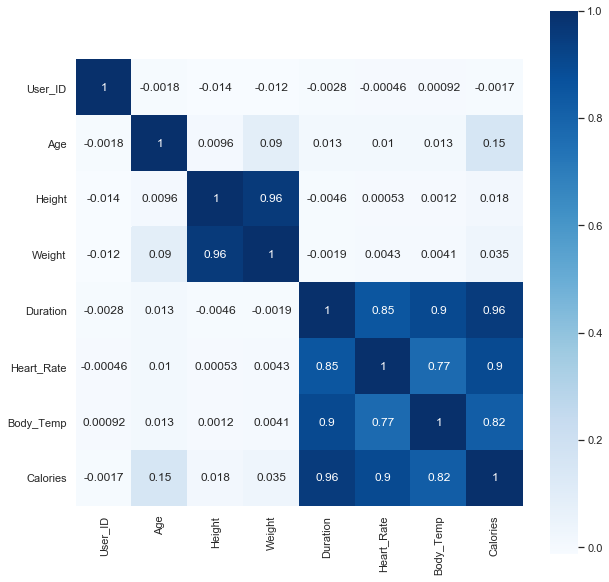

In [20]:
#constructing a heatmap to understand the correlation
plt.figure(figsize =(10,10))
sns.heatmap(data.corr(), annot = True,cmap = 'Blues', square = True)

#### Converting text column to numerical

In [21]:
data.replace({'Gender':{'male': 0,
                       'female': 1}}, 
             inplace = True)

In [22]:
data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


### Feature selection

In [23]:
#Separating target and features
X = data.drop(['User_ID','Calories'], axis = 1)
Y = data['Calories']

In [24]:
X

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,0,68,190.0,94.0,29.0,105.0,40.8
1,1,20,166.0,60.0,14.0,94.0,40.3
2,0,69,179.0,79.0,5.0,88.0,38.7
3,1,34,179.0,71.0,13.0,100.0,40.5
4,1,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...
14995,1,20,193.0,86.0,11.0,92.0,40.4
14996,1,27,165.0,65.0,6.0,85.0,39.2
14997,1,43,159.0,58.0,16.0,90.0,40.1
14998,0,78,193.0,97.0,2.0,84.0,38.3


In [25]:
Y

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64

#### Creating train test split

In [26]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 123)

In [27]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(12000, 7) (3000, 7) (12000,) (3000,)


### Model Training and Evaluation for XGBoost Regressor

#### Algorithm - XGBoost Regressor

In [28]:
#loading the model
model_xgb = XGBRegressor()

In [29]:
#training the model with X_train
model_xgb.fit(X_train,Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, objective='reg:squarederror',
             predictor='auto', random_state=0, reg_alpha=0, ...)

### Model Evaluation

#### Predicting on Test Data

In [30]:
test_data_prediction_xgb = model_xgb.predict(X_test)

In [31]:
test_data_prediction_xgb

array([121.75011  ,   4.9082255,  60.063    , ...,   5.4090514,
       125.52319  ,  52.70289  ], dtype=float32)

#### Checking MAE

In [32]:
mae_xgb = metrics.mean_absolute_error(Y_test, test_data_prediction_xgb)
print('Mean Absolute Error for XGBoost Regressor = ',mae_xgb)

Mean Absolute Error for XGBoost Regressor =  1.4931740948657195


### Model Training and Evaluation for Linear Regression

#### Algorithm - Linear Regression

In [33]:
#loading the model for LR
model_lr = LinearRegression()

In [34]:
#training the LR model on X_train
model_lr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Model Evaluation

#### Predicting on Test Data

In [35]:
test_data_prediction_lr = model_lr.predict(X_test)

In [36]:
test_data_prediction_lr

array([122.69368975,   0.62829369,  58.50085051, ...,  27.01569731,
       143.78624246,  50.81903106])

#### Checking MAE

In [37]:
mae_lr = metrics.mean_absolute_error(Y_test, test_data_prediction_lr)
print('Mean Absolute Error for Linear Regression = ',mae_lr)

Mean Absolute Error for Linear Regression =  8.419269108694794


- Hence we observed that XG Boost gives us lesser error than Linear Regression so we choose XG Boost algorithm for final prediction.